<h1>Conversor Decimal - Ponto Flutuante</h1>

Guilherme Afonso Pillon de Carvalho Alves Pessoa<p>
Departamento de Engenharia Elétrica DEE/UFRN


## Resumo

Este trabalho foi realizado com o intuito de ser apresentado como avaliação referente a 1 unidade do curso de métodos computacionais em engenharia na UFRN. O escopo do problema envolveu a conversão de numeros decimais para seus correspondentes em representação em binário com ponto flutuante regido pelas normas atuais do IEEE 754. O diferencial desta programação é que pode ser utilizada para realizar comparações entre precisões computacionais diferentes, tendo em vista que estas podem ser alteradas facilmente, fazendo com que este tipo de trabalho seja simples e intuitivo. Tendo o objetivo principal o de analisar os erros cometidos em viés de sua representação limitada pelo numero de bytes.

## Introdução

O padrão IEEE 754 (ANSI /IEEE Std 754-1985, New York, 1985 - IEEE Standard for Binary Floating-Point Arithmetic) contém normas a serem seguidas pelos fabricantes de computadores e construtores de Softwares no tratamento da aritmética binária para números de ponto flutuante relativo ao armazenamento, métodos de arredondamento, ocorrência de underflow e overflow, além, é claro, da realização das operações aritméticas básicas. Existe também o padrão IEEE 854 (ANSI/IEEE Std 854-1987, New York, 1987- IEEE Standard for Radix-Independent Floating-Point Arithmetic que tem os mesmos objetivos, porém, relativos a uma padronização para uma base independente genérica, para aqueles que utilizam outra base diferente da binária. A grande vantagem deste procedimento é permitir uma maior portabilidade dos softwares numéricos e criação de novos tipos de dados a fim de tratar problemas
conhecidos como “mal condicionados”. 
    Tendo como base o padrão IEEE 754, desenvolvemos um programa em python 3.6.2 que pudesse realizar tais conversões de forma eficiente e transparente, com o objetivo de analisar os diferentes erros de representação entre simples e dupla.

## Escopo do problema

Com o intuito de gerar números aleatórios para conversão para ponto flutuante, utilizamos a seguinte função  $f(x) = \sqrt{x^2+2x+5}-2sin(x)-x^2+3$. Utilizaremos uma iteração de cem repetições com um incremento de 0.5 na variável independente para realização do processo. Seguindo o escopo, devemos converte-los para binário em ponto flutuante e gerar um arquivo de texto contendo todos os bytes referentes aos números gerados. Com o arquivo de texto gerado, podemos dar início a segunda parte do problema que é ler os bytes e realizar a conversão inversa, retornando os números decimais iniciais. Para que após este ultimo passo, possamos analisar e comparar os resultados obtidos em relação a sua precisão numérica.

## Código

Antes de tudo, precisamos incluir bibliotecas para que o trabalho seja feito de forma mais eficiente. As escolhidas para este projeto são math, que é utilizada para realizar calculos matemáticos simples, como raiz quadrada e valor absosuto. E a biblioteca matplotlib que é utilizada para gerar gráficos para que possamos analisar de forma transparente os resultados da pesquisa.

In [7]:
import matplotlib.pyplot as plt
import math

Para realização do programa de forma mais limpa e de fácil visualização, criei três funções básicas que fazem o trabalho principal do programa. São elas : Conversão decimal para binário dado um numero inteiro retorna sua representação binária. Esta função foi utilizada na conversão decimal - binária dos expoentes dos numeros envolvidos.

In [8]:
def converterd_b(n):
    binario = ""
    while(True):
        binario = binario + str(n%2)
        n = n//2
        if n == 0:
            break
    binario = binario[::-1]
    binario = int(binario)
    return binario


Esta segunda função será amplamente utilizada no código principal, tendo em vista que ela recebe como parâmetro três valores, o primeiro deles (n) é o numero que será efetivamente convertido para sua representação em ponto flutuante. O segundo é o (nexpo) que será utilizado como representante do numero de bytes que compõem o expoente. Analogamente, a variável (nmantica) é responsável pela quantidade de bytes que representarão a mantissa do numero. Optei por fazer desta forma, com parâmetros extra de (nexpo) e (nmantica) para que utilizando o mesmo programa, possamos converter numeros decimais em seu representante com a quantidade de bytes desejada, não se limitando a 32 ou 64 bits. 

In [18]:
def flutobin(n,nexpo,nmantica):
    expoente =0;
    fracionada =0;

    if n > 0: #Verifica o sinal do numero
        datasend = str('0');
    elif n < 0:
        datasend = str('1');
        
    n1 = n;
    n1 = abs(n1); #A partir deste ponto trabalha com o valor absoluto

    if n1 < 1: # Cálculo dos expoentes
        while n1 < 1:
            n1 = n1*2.0;
            expoente = expoente+1;
        expoente = expoente*(-1);
    elif n1 >=2:
        while n1 >= 2:
            n1 = n1/2.0;
            expoente = expoente+1;
    elif n1 >= 1:
        if n1 <2:
            expoente =0;
            

    expoente = (expoente) + ((2**nexpo)-1); #Converte o expoente analisado a partit da quantidade de bytes para o expoente
    expoente = converterd_b(expoente) #Converte o expoente final para binário
    testetamanho = str(expoente); #Testa a quantidade de bytes do expoente
    
    if len(testetamanho) < nexpo+1: #Se for menor que a selecionada, adiciona '0' para completar
        for juk in range((nexpo+1)-len(testetamanho)):
            datasend += '0';
            
    datasend += str(expoente)

    fracionada  = n1- int(n1);

    contador = 0;
    j=0;
    for j in range(nmantica):#Cálculo da mantissa
        fracionada = fracionada *2;
        datasend += str(int(fracionada));
        fracionada = fracionada - int(fracionada)

    
    return datasend


Mas sempre respeitando a representação padrão IEE 754,sendo assim para que o número esteja de acordo com as normas, deve obedecer a seguinte configuração: $N = S*M*2^e$ onde S é o sinal, M é a mantissa ou parte fracionária, 2 é a base (binário) e E é o expoente. Deve ter a mesma forma utilizada em notação científica.Na representação em bits, usa-se a seguinte configuração para precisão simples 32 Bits:<p>
Exemplo: +9,5 em decimal<p>
Sinal Expoente	Mantissa<p>
0   | 10000010 | 00110000000000000000000<p>
Oque pode ser confirmado utilizando a função construida para isso:

In [21]:
exemplo1 = (flutobin(9.5,7,23));#Precisão Simples, assim como no exemplo anterior
print(exemplo1);

01000001000110000000000000000000


No sentido oposto, se foi necessária a criação de uma terceira função, que faz exatamente o oposto de sua análoga a cima. Da mesma forma a versatilidade em relação a precisão foi implementada, com o objetivo de criar o código de forma mais geral possível.

In [22]:
def bintoflu(bina,nexpo,nmantica):
    expo = 0.0;
    decimalval =0.0
    indice =0;
    
    for i in range (nexpo+1):#Calcula o expoente 
        if int(bina[i+1]) == 1:
            expo = expo + (2.0**(nexpo-i));

    expo = expo - ((2**nexpo)-1);#Expoente do numero real

    for contador in range(nmantica):#Calcula a parte decimal
        indice = int(bina[contador+(nexpo+2)]);
        if indice == 1:
            decimalval = decimalval + (1.0/(2.0**(contador+1)));

            
    decimalval = decimalval+1;

    if bina[0] == '1':#Adiciona Sinal negativo se necessario
        decimalval = decimalval *(-1);


    decimalval = decimalval * (2.0**expo); #Calculo final do numero

    return decimalval

Para reafirmar a eficácia da função construida, iremos fazer a conversão inversa do exemplo anterior para seu correspondente decimal

In [23]:
print(bintoflu(exemplo1,7,23));

9.5


De posse das funções essenciais, o proximo passo foi elaborar o corpo do programa, que foi feito da seguinte forma:

In [24]:
y = [0.0]*100; #Inicializando vetores para armazenamento
x = [0.0]*100;
vectBin = [0]*100;
vectBin2 = [0]*100;
sum =0.0;

arquivo = open('PontoFloat64B.txt', 'w');#Arquivo referente as representações em ponto flutuante 64 Bits
arquivo2 = open('PontoFloat32B.txt', 'w');#Arquivo referente as representações em ponto flutuante 32 Bits

quantidadenum = 100;#Quantidade de numeros a ser gerados / convertidos

for i in range(quantidadenum): #Gerar numeros pra serem convertidos
    if(i==0):
        x[i] = 0.5;#Valor inicial de x
    else:
        x[i] = x[i-1]+0.5;#Incremento de x
        
    y[i] = math.sqrt((x[i]*x[i])+((2*x[i])+5)) - (2*math.sin(x[i])) - (x[i]*x[i]) + 3;#Calcula y(x)




for i in range (quantidadenum):#Conversão 
    vectBin[i] = flutobin(y[i],10,52); #Para 64Bits
    vectBin2[i] = flutobin(y[i],7,23); #Para 32Bits
    arquivo.write(vectBin[i]);#Escreve no arquivo txt para 64 bits
    arquivo2.write(vectBin2[i]);#Escreve no arquivo txt para 32 bits
    
arquivo.close();
arquivo2.close();

Com todos os numeros decimais e suas representações armazenados em vetores nativos e em respectivos arquivos de texto, podemos analisar os resultados, com o objetivo de pontuar possíveis falhas, imprimindo os valores decimais e suas representações em 32 e 64 bits.

In [25]:
msg = '%i | %.4f | %s | %s';
print('Valor em Decimal | Valor em Ponto Flutuante 32 Bits | Valor em Ponto Flutuante 64 Bits')
for p in range(0,quantidadenum):
    print (msg % (p+1,y[p],vectBin2[p],vectBin[p]))

Valor em Decimal | Valor em Ponto Flutuante 32 Bits | Valor em Ponto Flutuante 64 Bits
1 | 4.2911 | 01000000100010010101000100010111 | 0100000000010001001010100010001011110001011101101001111101000010
2 | 3.1455 | 01000000010010010100111110100000 | 0100000000001001001010011111010000011110111110101011010101010110
3 | 1.9566 | 00111111111110100111000011110100 | 0011111111111111010011100001111010011000000100111001000001110101
4 | 0.7870 | 00111111010010010111010111111001 | 0011111111101001001011101011111100111011111000011111111101000000
5 | -0.4158 | 10111110110101001110010111000010 | 1011111111011010100111001011100001000001001000110111110111000000
6 | -1.8101 | 10111111111001111011000101111101 | 1011111111111100111101100010111110101101000011011110001010111000
7 | -3.6240 | 11000000011001111110111110110001 | 1100000000001100111111011111011000100101100010101011101010110100
8 | -6.1012 | 11000000110000110011110101000111 | 1100000000011000011001111010100011100011111000000001111001100010
9 | -

Após rápida análise dos resultados obtidos pela ultima iteração, podemos dar inicio a segunda parte do programa que é a decodificação dos numeros para a forma decimal.

In [26]:
arquivo = open('PontoFloat64B.txt', 'r'); #Abre arquivo txt referente aos numeros em precisão dupla
arquivo2 = open('PontoFloat32B.txt', 'r'); #Abre arquivo txt referente aos numeros em precisão dupla

datarecieve = arquivo.read(); #Aloca toda a informação contida no arquivo na string
datarecieve2 = arquivo2.read(); #Aloca toda a informação contida no arquivo na string

y2 = [0.0]*100;#Vetores para armazenamento
y3 = [0.0]*100;

qtenumeros = len(datarecieve)/64; #Calcula a quantidade de numeros no arquivo
qtenumeros2 = len(datarecieve2)/32; #Calcula a quantidade de numeros no arquivo

for g in range (int(qtenumeros)): # Percorre todo o arquivo com os incrementos adequados
    incremento = (64*g);#Incremento para 64 Bits
    incremento2 = (32*g);#Incremento para 32 Bits
    y3[g] = bintoflu(datarecieve2[incremento2:incremento2+32],7,23);# Faz a conversão 64 bits - decimal
    y2[g] = bintoflu(datarecieve[incremento:incremento+64],10,52);  # Faz a conversão 32 bits - decimal
    
arquivo.close();
arquivo2.close();

Agora podemos analisar os valores iniciais (y) gerados pela função primária e os valores finais (y2) e (y3) traduzidos respectivamente por precisão dupla e precisão simples.

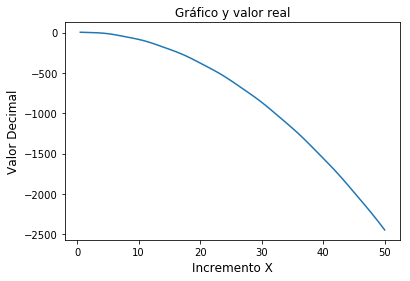

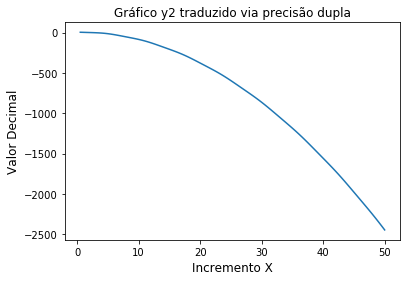

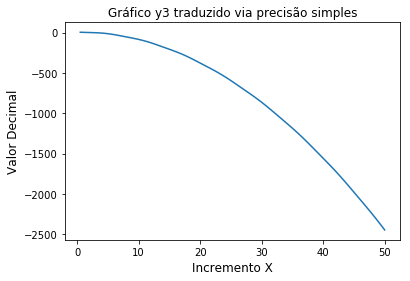

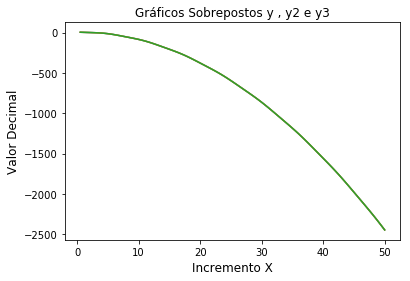

In [27]:
plt.title('Gráfico y valor real');
plt.xlabel('Incremento X', fontsize='large', color='black')
plt.ylabel('Valor Decimal', fontsize='large', color='black')
plt.plot(x,y);
plt.show();

plt.title('Gráfico y2 traduzido via precisão dupla');
plt.xlabel('Incremento X', fontsize='large', color='black')
plt.ylabel('Valor Decimal', fontsize='large', color='black')
plt.plot(x,y2);
plt.show();

plt.title('Gráfico y3 traduzido via precisão simples');
plt.xlabel('Incremento X', fontsize='large', color='black')
plt.ylabel('Valor Decimal', fontsize='large', color='black')
plt.plot(x,y3);
plt.show();

plt.title('Gráficos Sobrepostos y , y2 e y3');
plt.xlabel('Incremento X', fontsize='large', color='black')
plt.ylabel('Valor Decimal', fontsize='large', color='black')
plt.plot(x,y);
plt.plot(x,y2);
plt.plot(x,y3);
plt.show();

Como visualmente não conseguimos aferir nenhuma distorção nos valores escolhemos utilizar o método do erro médio absoluto percentual para uma visão mais ampla do resultado utilizando a forma $MPE = \frac{\sum_{\substack{i=0}}^{N} \frac{|y_i| - |y2_i|}{|y_i|}}{N}$. Além disso optei por também por gerar um vetor com os valores dos erros absolutos em cada um dos números , na forma $Erro_i = |y_i| - |y2_i|$ para ambos os casos de precisão dupla e simples.

In [28]:
erro = [0.0]*100;
erro2 = [0.0]*100;

somaterros =0.0;
somaterros2 = 0.0;

mpe = 0.0;
mpe2 = 0.0;

for i in range(int(qtenumeros)): # ANALISE DA REGRESSAO 64 bits
    erro[i] = abs(y[i]) - abs(y2[i]);
    mpe = mpe + (erro [i] / (abs(y[i])));
    somaterros = somaterros + erro[i];
    
for i in range(int(qtenumeros2)): # ANALISE DA REGRESSAO 32 bits
    erro2[i] = abs(y[i]) - abs(y3[i]);
    mpe2 = mpe2 + (erro2[i] / (abs(y[i])));
    somaterros = somaterros + erro2[i];

    
mpe = (mpe/qtenumeros)*100;
mpe2 = (mpe2/qtenumeros)*100;
print('Erro Absoluto Percentual para precisão dupla')
print(mpe)
print('Erro Absoluto Percentual para precisão simples')
print(mpe2)

Erro Absoluto Percentual para precisão dupla
0.0
Erro Absoluto Percentual para precisão simples
3.789650024517177e-06


Por fim podemos plotar os gráficos que representam os erros de cada uma das representações

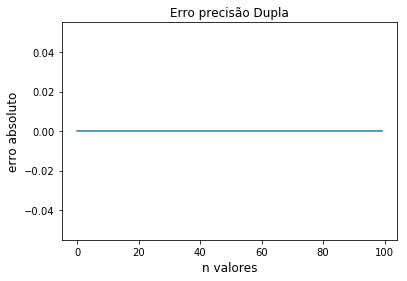

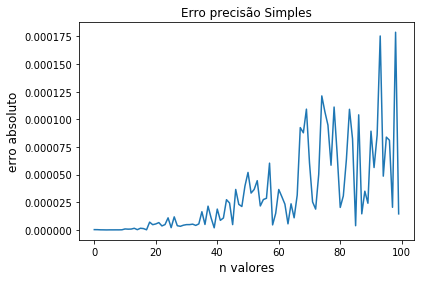

In [29]:
plt.title('Erro precisão Dupla');
plt.xlabel('n valores', fontsize='large', color='black')
plt.ylabel('erro absoluto', fontsize='large', color='black')
plt.plot(erro); #ERRO DE REPRESENTAÇÃO DUPLA
plt.show();

plt.title('Erro precisão Simples');
plt.xlabel('n valores', fontsize='large', color='black')
plt.ylabel('erro absoluto', fontsize='large', color='black')
plt.plot(erro2) # ERRO DE REPRESENTAÇÃO SIMPLES
plt.show();

## Conclusões

Com os resultados dos erros obtidos, podemos observar que não existe erro na representação de precisão dupla, pelo fato de não existir uma representação mais exata do que essa no computador em que o programa foi executado. Oque foi nitidamente percebido utilizando a representação em 32 Bits, chegando a um erro médio absoluto percentual de

In [30]:
print(mpe2)

3.789650024517177e-06


Desta forma podemos concluir que ambas as representações numéricas são válidas e eficientes, porém em iterações constantes podemos ter graves problemas com a representação numérica em geral. Tendo em vista que a exatidão nunca é completa.

## Referências

https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html <p>
https://matplotlib.org/examples/pylab_examples/subplots_demo.html<p>
http://carlosrafaelgn.com.br/aula/flutuante.html<p>
http://profvictorhugo.esy.es/de-tudo-um-pouco/expressoes-matematicas-em-latex-divisao-fracao/<p>
https://pt.slideshare.net/ivanpagnossin/expressoes-matematicas-com-o-latex<p>
http://neci-python.blogspot.com.br/2016/05/jupyter-notebook.html<p>
https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/<p>
https://garoa.net.br/wiki/Jupyter_Notebooks<p>
http://blog.evaldojunior.com.br/aulas/python/2009/02/08/curso-de-python-aula-12.html<p>
http://www.devfuria.com.br/python/manipulando-arquivos-de-texto/<p>
https://dtutoriais.wordpress.com/2010/07/24/aprendendo-python-5-lacos-de-repeticao/<p>
IEEE Computer Society (1985) IEEE Standard for Binary Floating-Point Aritmetic, IEEE Std 754-1985.<p>
http://steve.holasch.net/cgindex/Ieeefloat.html<p>